<a href="https://colab.research.google.com/github/Ishita95-harvad/Air-Quality-Index/blob/main/Air_Quality_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
CREATA MACHINE LEARNING MODEL TO CREATE  A WORKFLOW END TO END.

Here is all the data you need:
"AIR QUALITY INDEX.CSV.csv"

## Data loading

### Subtask:
Load the "AIR QUALITY INDEX.CSV.csv" dataset.


**Reasoning**:
Load the dataset "AIR QUALITY INDEX.CSV.csv" into a pandas DataFrame and display its first few rows and shape.



# Task
create a end to end workflow as a machine learning model

Here is all the data you need:
"aqi.csv.csv"

## Data loading

### Subtask:
Load the "aqi.csv.csv" dataset.


**Reasoning**:
Load the "aqi.csv.csv" dataset into a pandas DataFrame and display its first 5 rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('aqi.csv.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'aqi.csv.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse 'aqi.csv.csv'. Check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andaman and Nicobar,Sri Vijaya Puram,"Police Line, Sri Vijaya Puram - ANPCC",15-04-2025 05:00:00,11.654054,92.734055,SO2,6.0,42.0,22.0
1,India,Andaman and Nicobar,Sri Vijaya Puram,"Police Line, Sri Vijaya Puram - ANPCC",15-04-2025 05:00:00,11.654054,92.734055,PM10,3.0,500.0,110.0
2,India,Andaman and Nicobar,Sri Vijaya Puram,"Police Line, Sri Vijaya Puram - ANPCC",15-04-2025 05:00:00,11.654054,92.734055,NO2,13.0,31.0,23.0
3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",15-04-2025 05:00:00,16.515083,80.518167,PM2.5,38.0,51.0,44.0
4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",15-04-2025 05:00:00,16.515083,80.518167,PM10,44.0,91.0,56.0


(612, 11)


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify missing values, check data types, and examine the distribution of features. Determine the target variable for prediction.


**Reasoning**:
I need to explore the dataset, identify missing values, check data types, examine feature distributions, and determine the target variable.  This involves using `.info()`, `.describe()`, `.isnull().sum()`, histograms, and other descriptive statistics.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        612 non-null    object 
 1   state          612 non-null    object 
 2   city           612 non-null    object 
 3   station        612 non-null    object 
 4   last_update    612 non-null    object 
 5   latitude       612 non-null    float64
 6   longitude      612 non-null    float64
 7   pollutant_id   612 non-null    object 
 8   pollutant_min  561 non-null    float64
 9   pollutant_max  561 non-null    float64
 10  pollutant_avg  561 non-null    float64
dtypes: float64(5), object(6)
memory usage: 52.7+ KB
None
         latitude   longitude  pollutant_min  pollutant_max  pollutant_avg
count  612.000000  612.000000     561.000000     561.000000     561.000000
mean    21.963871   78.701575      22.871658      79.069519      45.356506
std      5.660411    5.002292      22.25

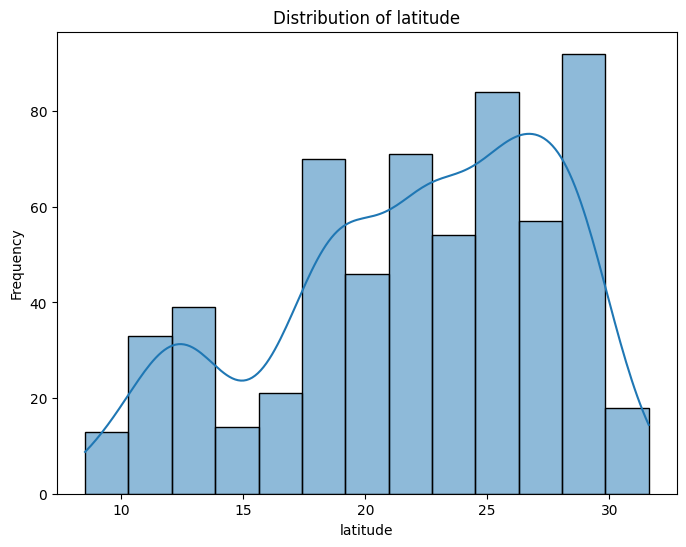

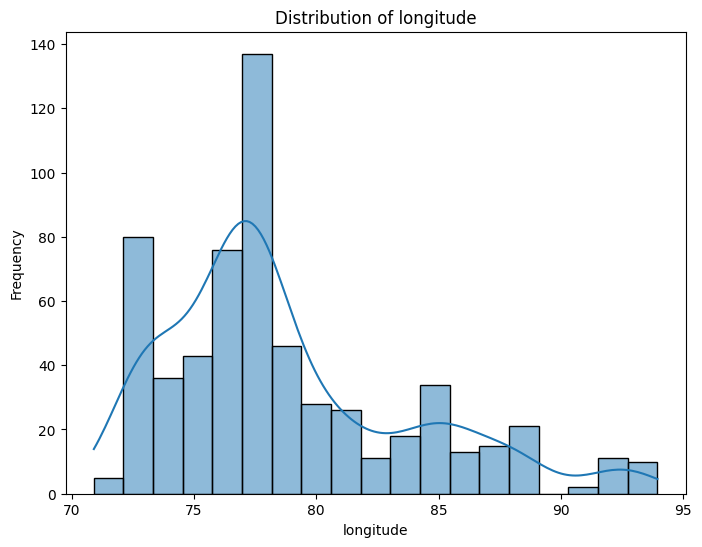

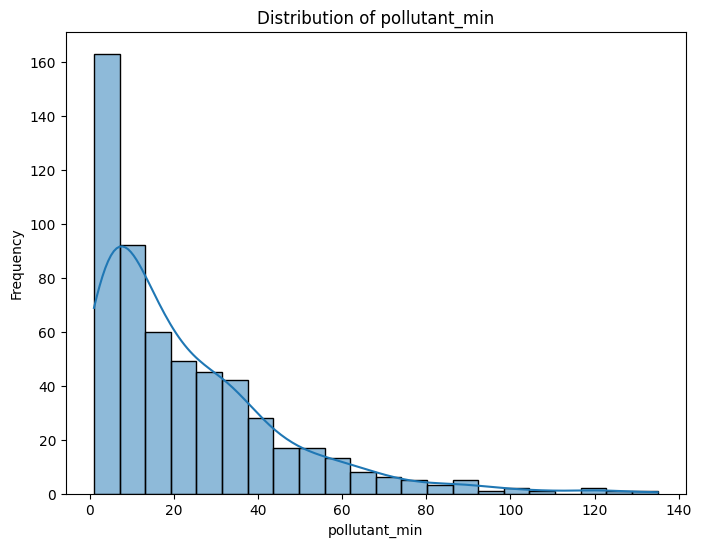

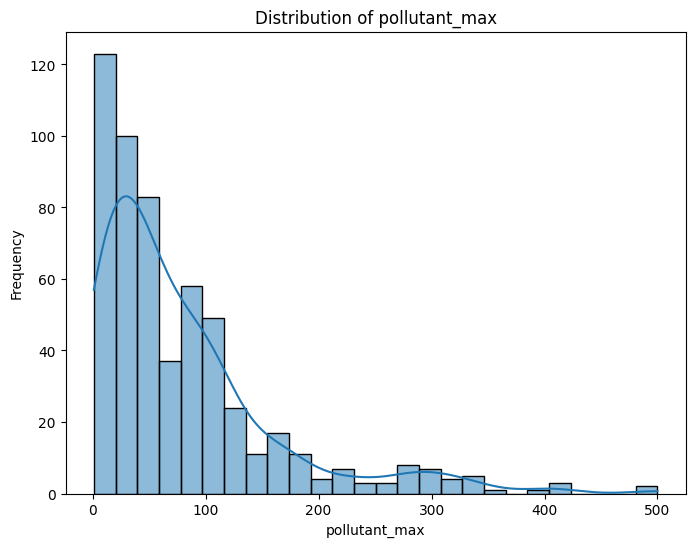

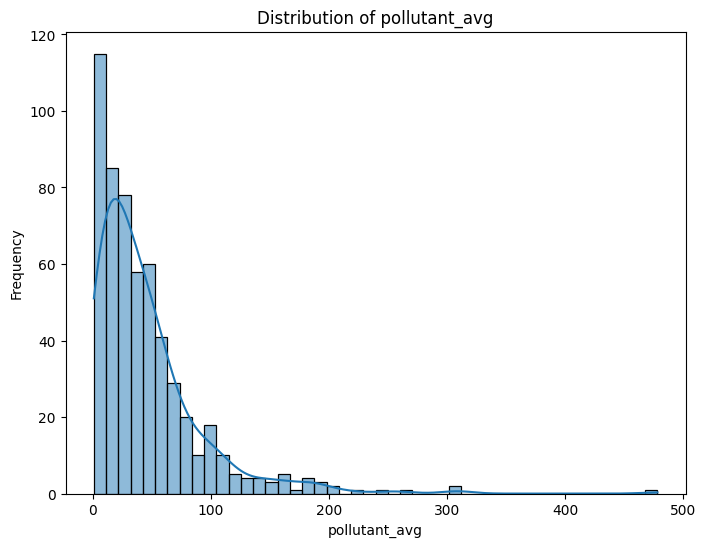

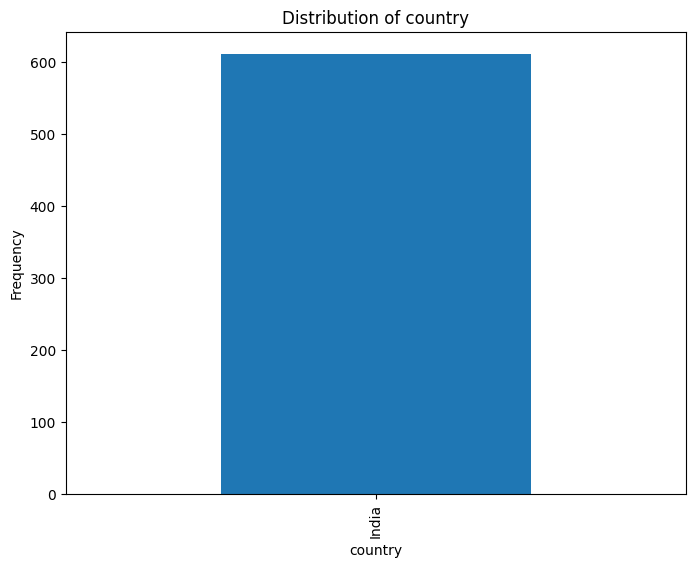

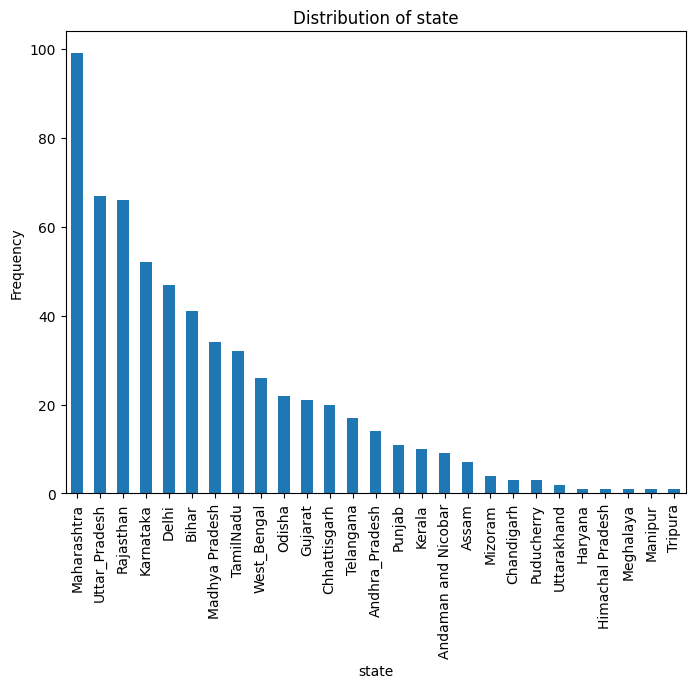

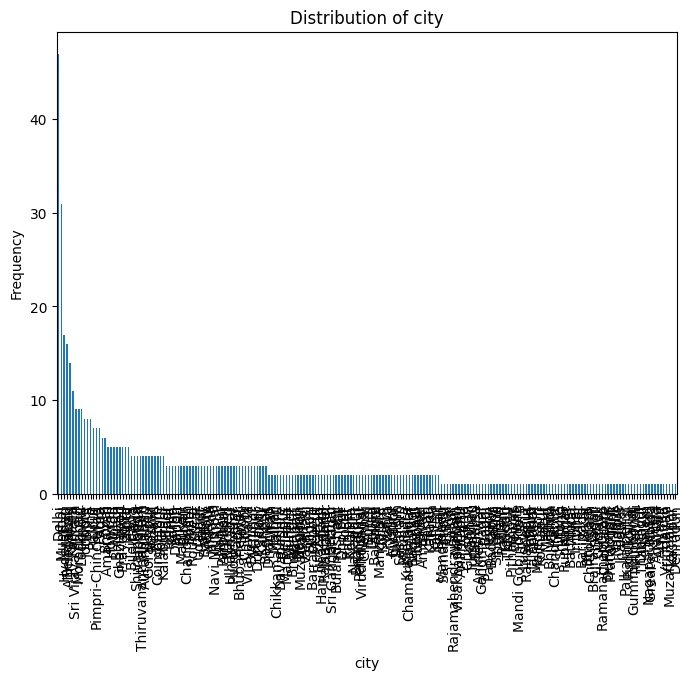

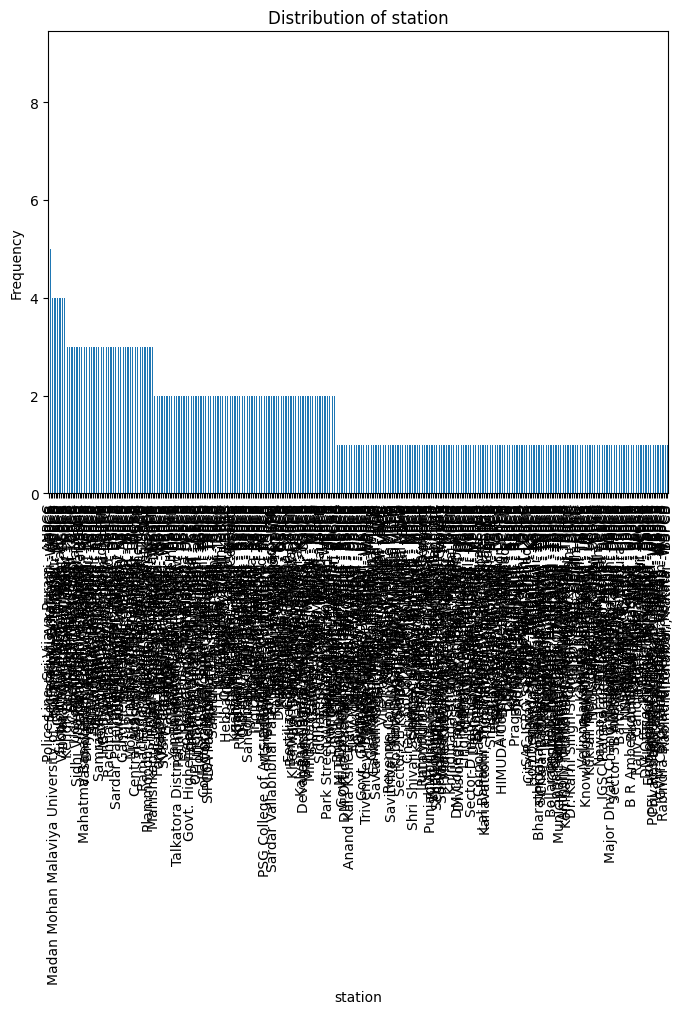

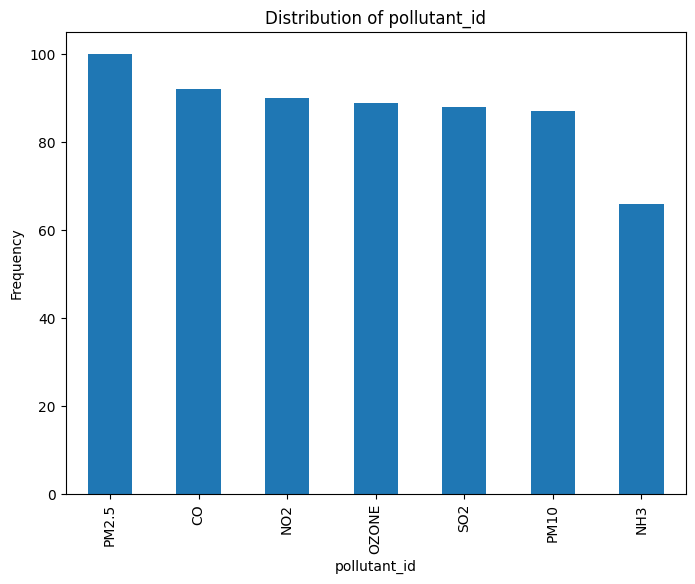

Target Variable: pollutant_avg


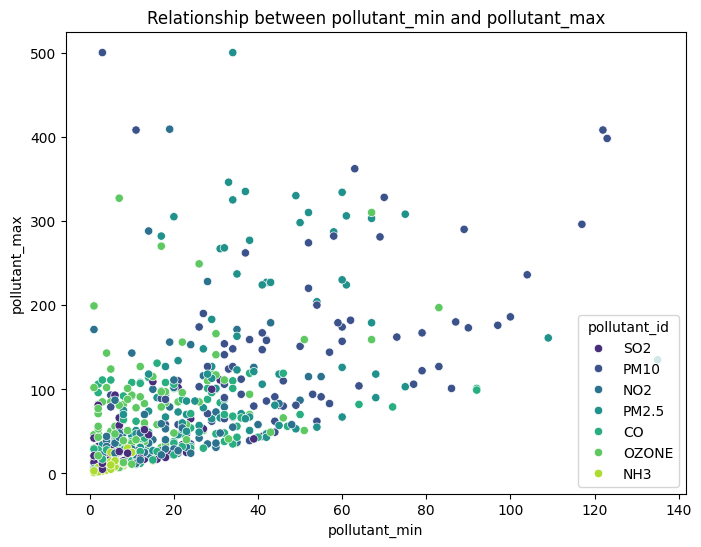

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Examine DataFrame structure
print(df.info())
print(df.describe())

# Identify missing values
print(df.isnull().sum())

# Analyze data types (already checked in previous steps)
#Further data type analysis based on the .info() output
for col in df.columns:
    print(f"Column '{col}': unique values: {df[col].unique()[:5]}")


# Examine feature distributions
numerical_features = ['latitude', 'longitude', 'pollutant_min', 'pollutant_max', 'pollutant_avg']
for col in numerical_features:
    plt.figure(figsize=(8, 6))  # Adjust figure size
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

categorical_features = ['country', 'state', 'city', 'station', 'pollutant_id']
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Determine target variable (pollutant_avg seems like a good candidate)
#Justification: We aim to predict the average pollutant level, so 'pollutant_avg' seems the most relevant variable.
#Further investigation into the other columns might be needed.
target_variable = 'pollutant_avg'
print(f"Target Variable: {target_variable}")

# Explore relationships between features (Optional, add more plots as needed)
#Example: Scatter plot of pollutant_min vs. pollutant_max
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pollutant_min', y='pollutant_max', data=df, hue='pollutant_id', palette='viridis') # added hue for better visualisation
plt.title('Relationship between pollutant_min and pollutant_max')
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling missing values, outliers, and duplicate rows.


**Reasoning**:
Handle missing values, outliers, and duplicates in the dataframe. Convert the 'last_update' column to datetime.



In [3]:
import pandas as pd
import numpy as np

# 1. Handle Missing Values
# Impute missing values in 'pollutant_min', 'pollutant_max', and 'pollutant_avg' with the median.
# Justification: Median is less sensitive to outliers compared to the mean.
for col in ['pollutant_min', 'pollutant_max', 'pollutant_avg']:
    df[col] = df[col].fillna(df[col].median())
print(f"Number of rows and columns after handling missing values: {df.shape}")

# 2. Outlier Detection and Treatment
# Identify and handle outliers using the IQR method.
# Justification: The IQR method is robust to extreme values and provides a good balance between outlier removal and data retention.
numerical_cols = ['latitude', 'longitude', 'pollutant_min', 'pollutant_max', 'pollutant_avg']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)
print(f"Number of rows and columns after outlier treatment: {df.shape}")

# 3. Duplicate Removal
# Remove duplicate rows, keeping the first occurrence.
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()
df = df[~duplicate_rows]
print(f"Number of duplicate rows removed: {num_duplicates}")
print(f"Number of rows and columns after removing duplicates: {df.shape}")

# 4. Data Type Conversion
# Convert 'last_update' to datetime.
try:
    df['last_update'] = pd.to_datetime(df['last_update'], format='%d-%m-%Y %H:%M:%S', errors='coerce')
except ValueError:
    print("Error converting 'last_update' to datetime")
print(f"Number of rows and columns after data type conversion: {df.shape}")

# Display the first few rows of the cleaned DataFrame
display(df.head())

Number of rows and columns after handling missing values: (612, 11)
Number of rows and columns after outlier treatment: (612, 11)
Number of duplicate rows removed: 0
Number of rows and columns after removing duplicates: (612, 11)
Number of rows and columns after data type conversion: (612, 11)


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andaman and Nicobar,Sri Vijaya Puram,"Police Line, Sri Vijaya Puram - ANPCC",2025-04-15 05:00:00,11.654054,88.903164,SO2,6.0,42.000,22.0
1,India,Andaman and Nicobar,Sri Vijaya Puram,"Police Line, Sri Vijaya Puram - ANPCC",2025-04-15 05:00:00,11.654054,88.903164,PM10,3.0,213.125,110.0
2,India,Andaman and Nicobar,Sri Vijaya Puram,"Police Line, Sri Vijaya Puram - ANPCC",2025-04-15 05:00:00,11.654054,88.903164,NO2,13.0,31.000,23.0
3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",2025-04-15 05:00:00,16.515083,80.518167,PM2.5,38.0,51.000,44.0
4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",2025-04-15 05:00:00,16.515083,80.518167,PM10,44.0,91.000,56.0


## Data preparation

### Subtask:
Prepare the data for model training by encoding categorical features and scaling numerical features.


**Reasoning**:
Encode categorical features using one-hot encoding and scale numerical features using standardization.



In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Encode categorical features
categorical_cols = ['country', 'state', 'city', 'station', 'pollutant_id']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Scale numerical features
numerical_cols = ['latitude', 'longitude', 'pollutant_min', 'pollutant_max', 'pollutant_avg']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_scaled = df_encoded

display(df_scaled.head())

,last_update,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg,country_India,state_Andaman and Nicobar,state_Andhra_Pradesh,state_Assam,...,"station_Wazirpur, Delhi - DPCC","station_Worli, Mumbai - MPCB","station_Yamunapuram, Bulandshahr - UPPCB",pollutant_id_CO,pollutant_id_NH3,pollutant_id_NO2,pollutant_id_OZONE,pollutant_id_PM10,pollutant_id_PM2.5,pollutant_id_SO2
0,2025-04-15 05:00:00,-1.822880,2.216286,-0.842252,-0.478642,-0.580325,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2025-04-15 05:00:00,-1.822880,2.216286,-1.007287,2.409136,2.208714,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2025-04-15 05:00:00,-1.822880,2.216286,-0.457171,-0.664270,-0.548631,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2025-04-15 05:00:00,-0.963401,0.418224,0.918118,-0.326765,0.116935,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2025-04-15 05:00:00,-0.963401,0.418224,1.248187,0.348245,0.497258,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Feature engineering

### Subtask:
Engineer new features from the existing ones in `df_scaled`.


**Reasoning**:
Create interaction features, extract time features from 'last_update', and evaluate the new features.



In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Create interaction features
df_scaled['min_max_interaction'] = df_scaled['pollutant_min'] * df_scaled['pollutant_max']
df_scaled['min_avg_interaction'] = df_scaled['pollutant_min'] * df_scaled['pollutant_avg']
# Add more interaction terms as needed

# 2. Extract time features
df_scaled['year'] = df_scaled['last_update'].dt.year
df_scaled['month'] = df_scaled['last_update'].dt.month
df_scaled['dayofweek'] = df_scaled['last_update'].dt.dayofweek
df_scaled['hour'] = df_scaled['last_update'].dt.hour

# Drop the original 'last_update' column
df_scaled = df_scaled.drop('last_update', axis=1)

# 4. Evaluate new features (using Linear Regression)
X = df_scaled.drop('pollutant_avg', axis=1)
y = df_scaled['pollutant_avg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with new features: {mse}")

display(df_scaled.head())

Mean Squared Error with new features: 0.10980362282572272


,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg,country_India,state_Andaman and Nicobar,state_Andhra_Pradesh,state_Assam,state_Bihar,...,pollutant_id_OZONE,pollutant_id_PM10,pollutant_id_PM2.5,pollutant_id_SO2,min_max_interaction,min_avg_interaction,year,month,dayofweek,hour
0,-1.822880,2.216286,-0.842252,-0.478642,-0.580325,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.403138,0.488780,2025,4,1,5
1,-1.822880,2.216286,-1.007287,2.409136,2.208714,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-2.426691,-2.224809,2025,4,1,5
2,-1.822880,2.216286,-0.457171,-0.664270,-0.548631,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.303685,0.250818,2025,4,1,5
3,-0.963401,0.418224,0.918118,-0.326765,0.116935,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.300009,0.107360,2025,4,1,5
4,-0.963401,0.418224,1.248187,0.348245,0.497258,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.434675,0.620672,2025,4,1,5


## Data splitting

### Subtask:
Split the data into training, validation, and testing sets.


**Reasoning**:
Split the preprocessed data into training, validation, and testing sets using train_test_split from scikit-learn.



In [6]:
from sklearn.model_selection import train_test_split

# Split data into training and temporary sets (70/30 split)
X = df_scaled.drop('pollutant_avg', axis=1)
y = df_scaled['pollutant_avg']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split temporary data into validation and testing sets (50/50 split of the 30%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (428, 622)
y_train shape: (428,)
X_val shape: (92, 622)
y_val shape: (92,)
X_test shape: (92, 622)
y_test shape: (92,)


## Model training

### Subtask:
Train a RandomForestRegressor model on the training data.


In [7]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Optimization

### Subtask:

Optimize the model using hyperparameter tuning.
Reasoning: Hyperparameter tuning helps find the best settings for the model to improve its performance on the validation set.

In [8]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the search
grid_search.fit(X_val, y_val)

# Get the best model
best_model = grid_search.best_estimator_

## Model Evaluation

## Subtask:

 Evaluate the optimized model on the testing set.
Reasoning: Evaluate the model's performance on unseen data (testing set) using appropriate metrics like Mean Squared Error (MSE), R-squared, etc

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the testing set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.17663328548856863
R-squared: 0.8529646772328436


# Finish Task

## Subtask:

Finalize the task by saving the model and summarizing the results.
Reasoning: Save the trained model for future use and summarize the key findings and model performance.

In [10]:
import joblib

# Save the model
joblib.dump(best_model, 'air_quality_prediction_model.pkl')

# Print a summary of the results
print("Model training and evaluation completed.")
print(f"Best model parameters: {grid_search.best_params_}")
print(f"Final model performance (MSE): {mse}")
print(f"Final model performance (R-squared): {r2}")

Model training and evaluation completed.
Best model parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Final model performance (MSE): 0.17663328548856863
Final model performance (R-squared): 0.8529646772328436


Saving th.jpeg to th.jpeg


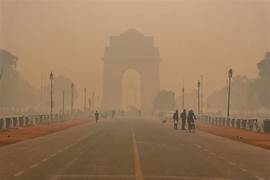

In [11]:
from IPython.display import Image, display
from google.colab import files

# Upload the image
uploaded = files.upload()

# Get the filename of the uploaded image
filename = list(uploaded.keys())[0]

# Display the image
display(Image(filename))

                             Thank You !